In [1]:
import os
print(os.getcwd())
os.chdir('..')
print(os.getcwd())

/opt/ar-application_router/notebooks
/opt/ar-application_router


# DIRPA Presentation

In [2]:
from time import time
import pandas as pd
from sklearn.utils import resample
from nltk.corpus import stopwords
STOP_WORDS = stopwords.words('portuguese')

## Accessing data

In [30]:
t0 = time()
n_samples=1000
dataset = pd.read_csv('./data/training_data/training_data_v04.csv', sep=';', encoding='utf-8')
dataset = dataset[dataset.area!='NOT DEFINED']
dataset = resample(dataset, replace=False, n_samples=n_samples, random_state=572)
print('Took {0}s to read dataset.'.format(time()-t0))

Took 5.626246213912964s to read dataset.


In [31]:
dataset.head()

,codigo_interno,numero_inpi,data_deposito,area,techsector,simbolo,ordem,titulo,resumo
288473,1036262,112015014157,2013-12-13,DINEC,13.0,"['A61C 17/22', 'A61C 19/04', 'A61B 5/00']","['3', '1', '2']",APARELHO DENTAL; E MÉTODO PARA DETECTAR A PLAC...,RESUMO APARELHO DENTAL; E MÉTODO PARA DETECTAR...
58926,445084,PI9204304,1992-10-30,DITEM,25.0,['B67C 1/16'],['1'],LAVADORA AUTOMÁTICA LINEAR,"Patente de Invenção para ""LAVADORA AUTOMÁTICA ..."
339634,1374048,112016006755,2014-09-29,DIPEQ,12.0,['G07C 9/00'],['1'],CONTROLE DE ACESSO USANDO DISPOSITIVOS ELETRÔN...,A presente invenção refere-se a um sistema de ...
60214,462876,PI9405093,1994-12-22,DINEC,34.0,"['B62J 9/00', 'A45C 5/00']","['2', '1']","CESTO PARA TRANSPORTE DE PEQUENOS OBJETOS, CON...","Patente de Invenção de ""CESTO PARA TRANSPORTE ..."
18974,521281,PI9900940,1999-03-24,DITEM,25.0,['B65D 19/00'],['1'],DISPOSITIVO E PROCESSO PARA O TRANSPORTE DE CA...,"<B>""DISPOSITIVO E PROCESSO PARA O TRANSPORTE D..."


## What happens behind the scene?

Let's get an example! This is the raw data:

In [32]:
print('Resumo: ', dataset['resumo'][dataset.index[0]])
print(len(dataset['resumo'][dataset.index[0]]), 'letras')

Resumo:  RESUMO APARELHO DENTAL; E MÉTODO PARA DETECTAR A PLACA DENTAL A presente invenção refere-se a um aparelho dental. O aparelho dental inclui um cabo incluindo um botão liga/desliga configurado para posicionar o aparelho dental nas configurações de liga/desliga. Um controlador é alojado no interior do cabo e inclui um módulo de detecção de boca e um módulo de anomalia do dente. Um circuito elétrico está em comunicação operacional com o módulo de detecção de boca e o módulo de anomalia do dente e é configurado para emitir uma luz de excitação de baixa intensidade que tem uma primeira frequência e uma luz de excitação de alta intensidade que pode ter uma segunda frequência. A luz de excitação de baixa intensidade é utilizada para detectar a presença de material de dente e a luz de excitação de alta intensidade é utilizada para detectar a presença de uma anomalia do dente ou até tratar um problema no dente. 1/1
918 letras


We have a function that tokenize a text. What does it mean? We transform a text in a list of tokens.

In [33]:
def word_tokenizer(text, sw=False):
    import re
    from nltk.stem import RSLPStemmer

    text = text.lower()
    text = re.sub(r'[^a-z\- àáâãçéêëíóôõöúü]', '', text)
    if sw:
        words = [RSLPStemmer().stem(word) for word in text.split() if len(word) > 2 and word not in STOP_WORDS]
    else:
        words = [RSLPStemmer().stem(word) for word in text.split() if len(word) > 2]
    return words

And this is the list of tokens for that text example:

In [34]:
print('Tokens do resumo:', word_tokenizer(dataset['resumo'][dataset.index[0]]))
print(len(word_tokenizer(dataset['resumo'][dataset.index[0]])), 'tokens')

Tokens do resumo: ['resum', 'aparelh', 'dent', 'métod', 'par', 'detect', 'plac', 'dent', 'pres', 'invenç', 'refere-s', 'aparelh', 'dent', 'aparelh', 'dent', 'inclu', 'cab', 'inclu', 'bot', 'ligadeslig', 'configur', 'par', 'posic', 'aparelh', 'dent', 'na', 'configur', 'ligadeslig', 'control', 'aloj', 'interi', 'cab', 'inclu', 'módul', 'detecç', 'boc', 'módul', 'anomal', 'dent', 'circuit', 'elétr', 'est', 'comunic', 'operac', 'com', 'módul', 'detecç', 'boc', 'módul', 'anomal', 'dent', 'configur', 'par', 'emit', 'uma', 'luz', 'excit', 'baix', 'intens', 'que', 'tem', 'uma', 'prim', 'frequ', 'uma', 'luz', 'excit', 'alt', 'intens', 'que', 'pod', 'ter', 'uma', 'segund', 'frequ', 'luz', 'excit', 'baix', 'intens', 'utiliz', 'par', 'detect', 'presenç', 'mater', 'dent', 'luz', 'excit', 'alt', 'intens', 'utiliz', 'par', 'detect', 'presenç', 'uma', 'anomal', 'dent', 'até', 'trat', 'problem', 'dent']
100 tokens


And this is the list of tokens for that text example when we exclude the stopwords:

In [35]:
print('Tokens do resumo:', word_tokenizer(dataset['resumo'][dataset.index[0]], True))
print(len(word_tokenizer(dataset['resumo'][dataset.index[0]], True)), 'tokens')

Tokens do resumo: ['aparelh', 'dent', 'métod', 'par', 'detect', 'plac', 'dent', 'pres', 'invenç', 'refere-s', 'aparelh', 'dent', 'aparelh', 'dent', 'inclu', 'cab', 'inclu', 'bot', 'ligadeslig', 'configur', 'par', 'posic', 'aparelh', 'dent', 'configur', 'ligadeslig', 'control', 'aloj', 'interi', 'cab', 'inclu', 'módul', 'detecç', 'boc', 'módul', 'anomal', 'dent', 'circuit', 'elétr', 'est', 'comunic', 'operac', 'com', 'módul', 'detecç', 'boc', 'módul', 'anomal', 'dent', 'configur', 'par', 'emit', 'luz', 'excit', 'baix', 'intens', 'tem', 'prim', 'frequ', 'luz', 'excit', 'alt', 'intens', 'pod', 'ter', 'segund', 'frequ', 'luz', 'excit', 'baix', 'intens', 'utiliz', 'par', 'detect', 'presenç', 'mater', 'dent', 'luz', 'excit', 'alt', 'intens', 'utiliz', 'par', 'detect', 'presenç', 'anomal', 'dent', 'até', 'trat', 'problem', 'dent']
91 tokens


These are the stopwords we are considering:

In [36]:
print(len(STOP_WORDS), STOP_WORDS)

477 ['À', 'ÀS', 'Às', 'à', 'às', 'A', 'ACRÉSCIMO', 'ACRÉSCIMOS', 'ALGO', 'ALGUÉM', 'ALGUM', 'ALGUMA', 'ALGUMAS', 'ALGUNS', 'AO', 'AOS', 'APESAR', 'AQUELA', 'AQUELAS', 'AQUELE', 'AQUELES', 'AQUILO', 'AS', 'AUMENTO', 'Acréscimo', 'Acréscimos', 'Algo', 'Alguém', 'Algum', 'Alguma', 'Algumas', 'Alguns', 'Ao', 'Aos', 'Apesar', 'Aquela', 'Aquelas', 'Aquele', 'Aqueles', 'Aquilo', 'As', 'Aumento', 'CADA', 'CARACTERIZADA', 'CARACTERIZADO', 'CERTA', 'CERTAS', 'CERTO', 'CERTOS', 'COMO', 'CONFORME', 'CONTUDO', 'CRESCIMENTO', 'CRESCIMENTOS', 'CUJA', 'CUJAS', 'CUJO', 'CUJOS', 'Cada', 'Caracterizada', 'Caracterizado', 'Certa', 'Certas', 'Certo', 'Certos', 'Como', 'Conforme', 'Contudo', 'Crescimento', 'Crescimentos', 'Cuja', 'Cujas', 'Cujo', 'Cujos', 'DA', 'DAS', 'DE', 'DESENHO', 'DESENHOS', 'DIMINUIÇÃO', 'DIMINUIÇÕES', 'DO', 'DOS', 'DUM', 'DUMA', 'DUMAS', 'DUNS', 'Da', 'Das', 'De', 'Desenho', 'Desenhos', 'Diminuição', 'Diminuições', 'Do', 'Dos', 'Dum', 'Duma', 'Dumas', 'Duns', 'ELA', 'ELAS', 'ELE', 'E

Using the Scikit Learn package to vectorize the dataset

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word', tokenizer=word_tokenizer,
                        strip_accents='unicode', stop_words=STOP_WORDS,
                        ngram_range=(1, 1), max_df=.95, min_df=1,
                        sublinear_tf=True)
features = tfidf.fit_transform(dataset['resumo'].values)
print(len(tfidf.vocabulary_), tfidf.vocabulary_)

7367 {'resum': 6112, 'aparelh': 613, 'dent': 2071, 'metod': 4478, 'par': 5064, 'detect': 2227, 'plac': 5290, 'pres': 5568, 'invenca': 4017, 'refere-s': 5967, 'inclu': 3785, 'cab': 1158, 'bota': 1095, 'ligadeslig': 4222, 'configur': 1721, 'posic': 5445, 'configuraco': 1724, 'control': 1831, 'aloj': 419, 'interi': 3955, 'modul': 4571, 'detecca': 2225, 'boc': 1067, 'anomal': 535, 'circuit': 1446, 'eletr': 2522, 'est': 2835, 'comunicaca': 1658, 'operac': 4938, 'com': 1570, 'emit': 2595, 'luz': 4305, 'excitaca': 2960, 'baix': 910, 'intens': 3934, 'tem': 6744, 'prim': 5601, 'frequenc': 3291, 'alt': 436, 'pod': 5327, 'ter': 6772, 'segund': 6309, 'utiliz': 7120, 'presenc': 5572, 'mater': 4381, 'ate': 797, 'trat': 6971, 'problem': 5618, 'patent': 5111, 'lav': 4166, 'automa': 859, 'line': 4237, 'ref': 5963, 'particul': 5093, 'adequ': 241, 'frasc': 3281, 'garrafo': 3361, 'convenc': 1835, 'acondicion': 206, 'liqu': 4251, 'compreend': 1634, 'bas': 933, 'defin': 2031, 'percurs': 5172, 'long': 4283, 

And the TFIDF (term frequency inverse document frequency) matrix is:

In [38]:
print(len(tfidf.idf_), tfidf.idf_)

7367 [ 7.216  7.216  7.216 ...  5.136  7.216  7.216]


(1000, 9)
DIMEC       138
DIPEQ        85
DINEC        79
DITEM        78
DIPOL        66
DITEL        65
DICIV        59
DICEL        54
DINOR        52
DIFEL        49
DITEX        49
DIPAE        43
DIALP        32
DIPAQ        32
DIMOL        29
DIFAR-I      28
DIFAR-II     28
DIBIO        21
DIMAT        13
Name: area, dtype: int64


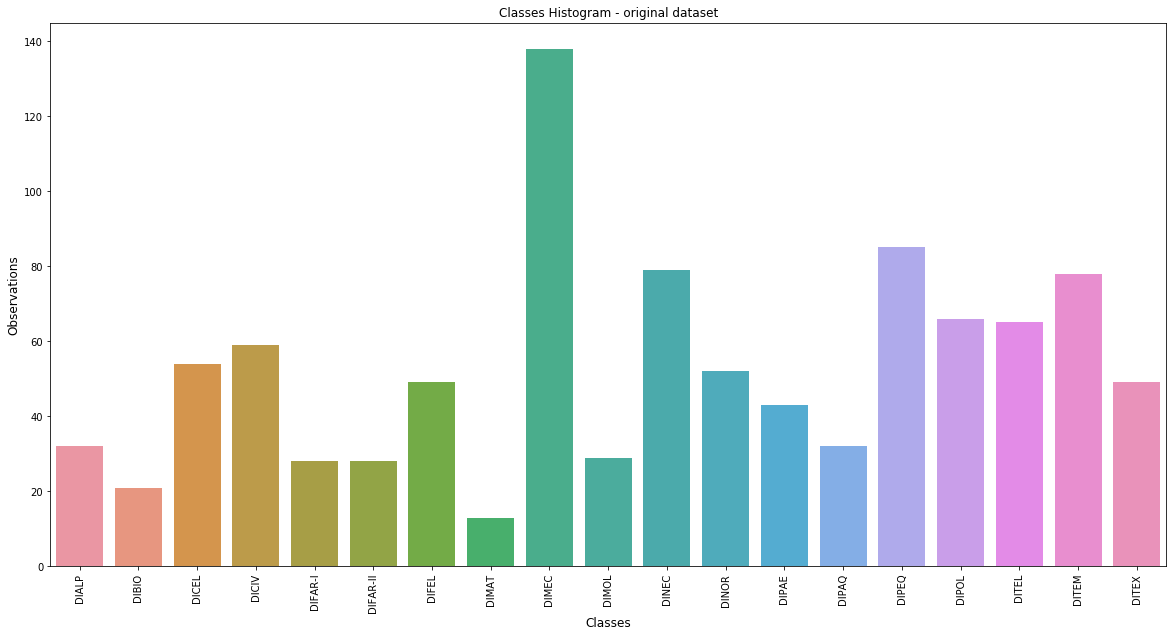

In [39]:
import matplotlib.pyplot as plt 
import seaborn as sns
fig = plt.figure(figsize=(20, 10))
ax1 = sns.countplot(dataset['area'].sort_values())
plt.ylabel('Observations', fontsize=12)
plt.xlabel('Classes', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Classes Histogram - original dataset')
print(dataset.shape)
print(dataset['area'].value_counts())
plt.show()

In [40]:
ds_bal = dataset

# # Upsampling to max number of samples on a givin class
# areas = ds_cleared['area'].value_counts()

# ds = {}
# for area in areas.keys():
#     ds[area] = ds_cleared[ds_cleared.area == area]
#     ds[area] = resample(ds[area], replace=True, n_samples=areas.max(), random_state=534)

# ds_bal = pd.concat([ds[area] for area in ds])
# print(ds_bal.shape)

# fig = plt.figure(figsize=(20, 10))
# ax2 = sns.countplot(ds_bal['area'].sort_values())
# plt.ylabel('Observations', fontsize=12)
# plt.xlabel('Classes', fontsize=12)
# plt.xticks(rotation='vertical')
# plt.title('Classes Histogram - upsampling balanced data set')
# print(ds_bal['area'].value_counts())
# plt.show()

In [41]:
# Features Extraction
import os
import dill
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

t0=time()
STOP_WORDS = stopwords.words('portuguese')
n_grams = 1
tff = './demo/features_titulo.dill'
rff = './demo/features_resumo.dill'

tfidf = TfidfVectorizer(analyzer='word', tokenizer=word_tokenizer,
                        strip_accents='unicode', stop_words=STOP_WORDS,
                        ngram_range=(1, n_grams), max_df=.95, min_df=1,
                        sublinear_tf=True)

if tff not in os.listdir():
    features_titulo = tfidf.fit_transform(ds_bal['titulo'].values)
    with open(tff, 'wb') as f:
        dill.dump(features_titulo, f, dill.HIGHEST_PROTOCOL)
else:
    with open(tff, 'rb') as f:
        features_titulo = dill.load(f)

if rff not in os.listdir():
    features_resumo = tfidf.fit_transform(ds_bal['resumo'].values)
    with open(rff, 'wb') as f:
        dill.dump(features_resumo, f, dill.HIGHEST_PROTOCOL)
else:
    with open(rff, 'rb') as f:
        features_resumo = dill.load(f)
print('Shape of titulo features matrix: ', features_titulo.shape)
print('Shape of resumo features matrix: ', features_resumo.shape)
print('Took {0}s to extract features from titulo and resumo'.format(time()-t0))

Shape of titulo features matrix:  (1000, 2341)
Shape of resumo features matrix:  (1000, 7367)
Took 87.82792949676514s to extract features from titulo and resumo


In [42]:
# Reduce Dimensionality
from sklearn.decomposition import TruncatedSVD

t0 = time()
tsf = './demo/svd_titulo.dill'
rsf = './demo/svd_resumo.dill'


if tsf not in os.listdir():
    svd = TruncatedSVD(n_components=20, algorithm='randomized')
    svd_titulo = svd.fit_transform(features_titulo)
    with open(tsf, 'wb') as f:
        dill.dump(svd_titulo, f, dill.HIGHEST_PROTOCOL)
else:
    with open(tsf, 'rb') as f:
        svd_titulo = dill.load(f)

if rsf not in os.listdir():
    svd = TruncatedSVD(n_components=30, algorithm='randomized')
    svd_resumo = svd.fit_transform(features_resumo)
    with open(rsf, 'wb') as f:
        dill.dump(svd_resumo, f, dill.HIGHEST_PROTOCOL)
else:
    with open(rsf, 'rb') as f:
        svd_resumo = dill.load(f)
print('Shape of titulo svd matrix: ', svd_titulo.shape)
print('Shape of resumo svd matrix: ', svd_resumo.shape)
print('Took {0}s to calculate svd matrices for titulo and resumo'.format(time()-t0))

Shape of titulo svd matrix:  (1000, 20)
Shape of resumo svd matrix:  (1000, 30)
Took 0.2097001075744629s to calculate svd matrices for titulo and resumo


In [43]:
# Encode Classes
from sklearn.preprocessing import LabelEncoder

t0 = time()
aef = './demo/encoded_area.dill'
ef = './demo/l_enc.dill'

if aef not in os.listdir():
    l_enc = LabelEncoder()
    y = l_enc.fit_transform(ds_bal['area'].values)
    with open(aef, 'wb') as f:
        dill.dump(y, f, dill.HIGHEST_PROTOCOL)
    with open(ef, 'wb') as f:
        dill.dump(l_enc, f, dill.HIGHEST_PROTOCOL)
else:
    with open(aef, 'rb') as f:
        y = dill.load(f)
    with open(ef, 'rb') as f:
        l_enc = dill.load(f)
print('Encoded areas: ', list([(i, l_enc.classes_[i]) for i in range(0, len(l_enc.classes_))]))
print('Took {0}s to encode all classes'.format(time()-t0))

Encoded areas:  [(0, 'DIALP'), (1, 'DIBIO'), (2, 'DICEL'), (3, 'DICIV'), (4, 'DIFAR-I'), (5, 'DIFAR-II'), (6, 'DIFEL'), (7, 'DIMAT'), (8, 'DIMEC'), (9, 'DIMOL'), (10, 'DINEC'), (11, 'DINOR'), (12, 'DIPAE'), (13, 'DIPAQ'), (14, 'DIPEQ'), (15, 'DIPOL'), (16, 'DITEL'), (17, 'DITEM'), (18, 'DITEX')]
Took 0.004234790802001953s to encode all classes


In [44]:
# Split Train/Test examples
import numpy as np
from sklearn.model_selection import train_test_split

t0 = time()
X = np.concatenate([svd_titulo, svd_resumo], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=382)

print('X_train matrix shape is: {0}'.format(X_train.shape))
print('X_test matrix shape is: {0}'.format(X_test.shape))
print('y_train matrix shape is: {0}'.format(y_train.shape))
print('y_test matrix shape: {0}'.format(y_test.shape))
print('Splitting done in %0.3fs.' % (time() - t0))

X_train matrix shape is: (800, 50)
X_test matrix shape is: (200, 50)
y_train matrix shape is: (800,)
y_test matrix shape: (200,)
Splitting done in 0.002s.


DIMEC       29
DITEM       21
DIPEQ       18
DITEL       15
DINEC       14
DIPOL       14
DIPAE       12
DICEL       12
DINOR        9
DIFEL        8
DITEX        8
DICIV        8
DIFAR-II     7
DIPAQ        7
DIFAR-I      5
DIMOL        5
DIBIO        5
DIALP        2
DIMAT        1
Name: area, dtype: int64


/opt/ar-application_router/.venv/lib64/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


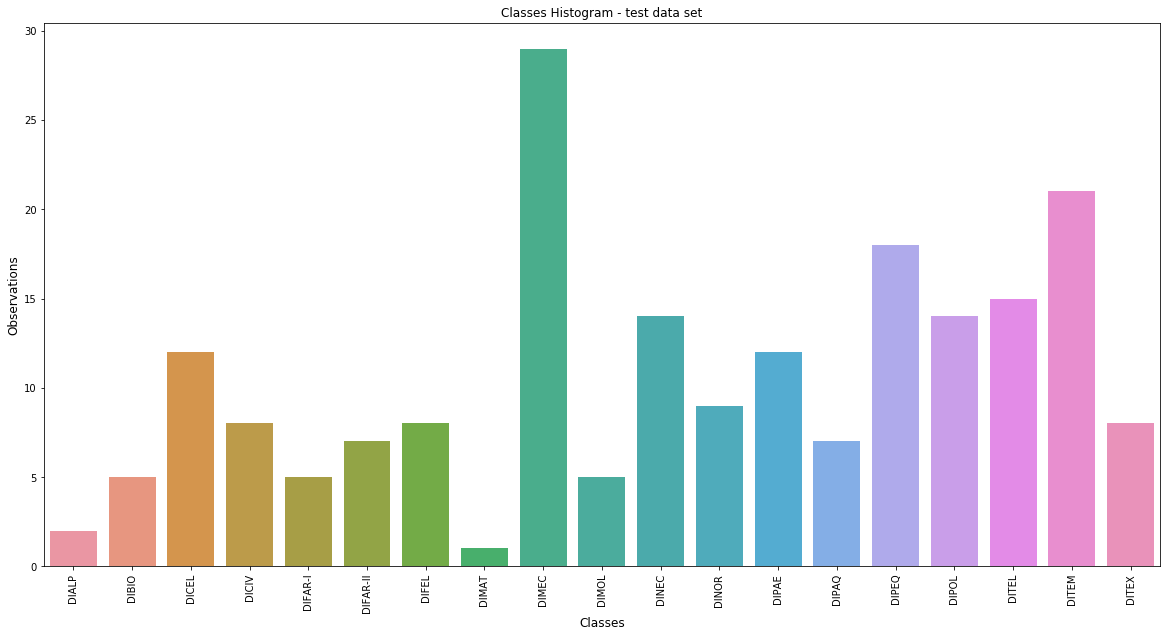

In [45]:
# Test set histogram
_y = pd.DataFrame(columns=['area'], data=sorted(l_enc.inverse_transform(y_test)))
fig = plt.figure(figsize=(20, 10))
ax = sns.countplot(_y['area'].sort_values())
plt.ylabel('Observations', fontsize=12)
plt.xlabel('Classes', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Classes Histogram - test data set')
print(_y['area'].value_counts())
plt.show()

# Simulation phase

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

Mean Accuracy:  0.39
F1 score:  [('DIALP', 0.25), ('DIBIO', 0.28571428571428575), ('DICEL', 0.34782608695652173), ('DICIV', 0.3157894736842105), ('DIFAR-I', 0.28571428571428575), ('DIFAR-II', 0.7058823529411764), ('DIFEL', 0.47058823529411764), ('DIMAT', 0.0), ('DIMEC', 0.4313725490196078), ('DIMOL', 0.6), ('DINEC', 0.2807017543859649), ('DINOR', 0.15384615384615383), ('DIPAE', 0.23529411764705882), ('DIPAQ', 0.5), ('DIPEQ', 0.24), ('DIPOL', 0.6923076923076924), ('DITEL', 0.7407407407407408), ('DITEM', 0.34285714285714286), ('DITEX', 0.15384615384615385)]


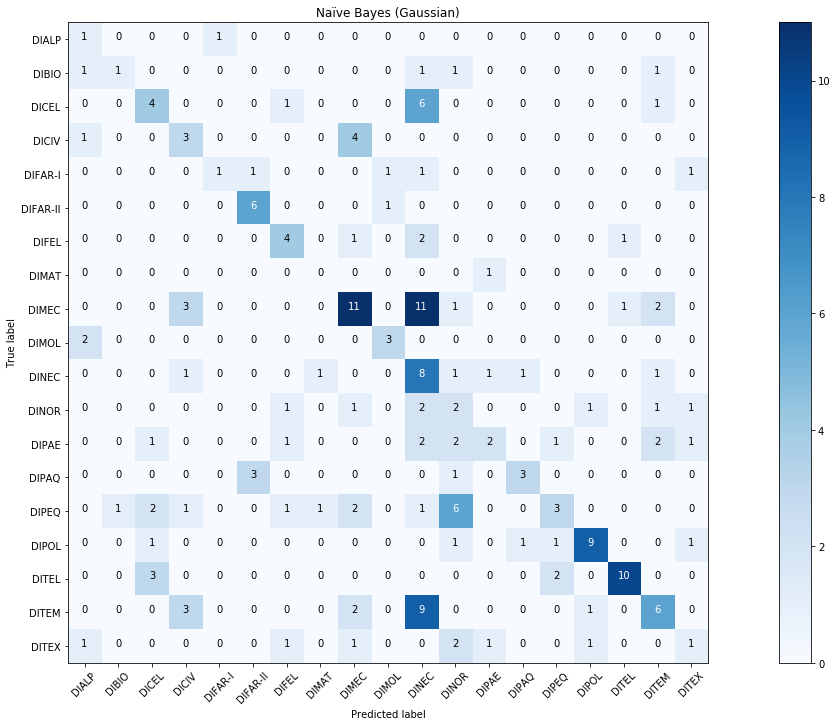

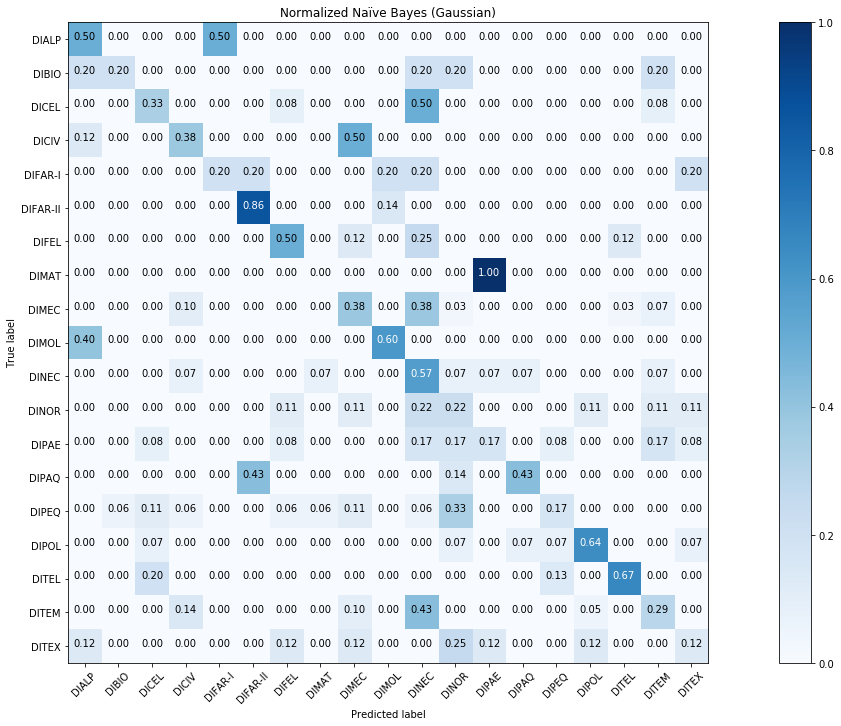

In [47]:
# Naïve Bayes - Gaussian
import itertools
from sklearn.naive_bayes import GaussianNB
cmap=plt.get_cmap('Blues')
np.set_printoptions(formatter={'float': '{: 0.3f}'.format}, precision=2)


# Train & Predict
algorithm_name = 'Naïve Bayes (Gaussian)'
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print('Mean Accuracy: ', acc)

# F1_score
f1score = f1_score(y_test, y_pred, average=None, labels=np.arange(len(l_enc.classes_)))
print('F1 score: ', list(zip(l_enc.classes_, f1score)))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20, 10))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(algorithm_name)
plt.colorbar()
tick_marks = np.arange(len(list(l_enc.classes_)))
plt.xticks(tick_marks, list(l_enc.classes_), rotation=45)
plt.yticks(tick_marks, list(l_enc.classes_))
# fmt = '.2f' if normalize else 'd'
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Normalized Confusion Matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(20, 10))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Normalized ' + algorithm_name)
plt.colorbar()
tick_marks = np.arange(len(list(l_enc.classes_)))
plt.xticks(tick_marks, list(l_enc.classes_), rotation=45)
plt.yticks(tick_marks, list(l_enc.classes_))
# fmt = '.2f' if normalize else 'd'
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Mean Accuracy:  0.335
F1 score:  [('DIALP', 0.0), ('DIBIO', 0.1818181818181818), ('DICEL', 0.34782608695652173), ('DICIV', 0.08695652173913045), ('DIFAR-I', 0.0), ('DIFAR-II', 0.30769230769230765), ('DIFEL', 0.5263157894736842), ('DIMAT', 0.0), ('DIMEC', 0.417910447761194), ('DIMOL', 0.4), ('DINEC', 0.0), ('DINOR', 0.0), ('DIPAE', 0.11764705882352941), ('DIPAQ', 0.375), ('DIPEQ', 0.33333333333333337), ('DIPOL', 0.7999999999999999), ('DITEL', 0.6153846153846153), ('DITEM', 0.27027027027027023), ('DITEX', 0.35294117647058826)]


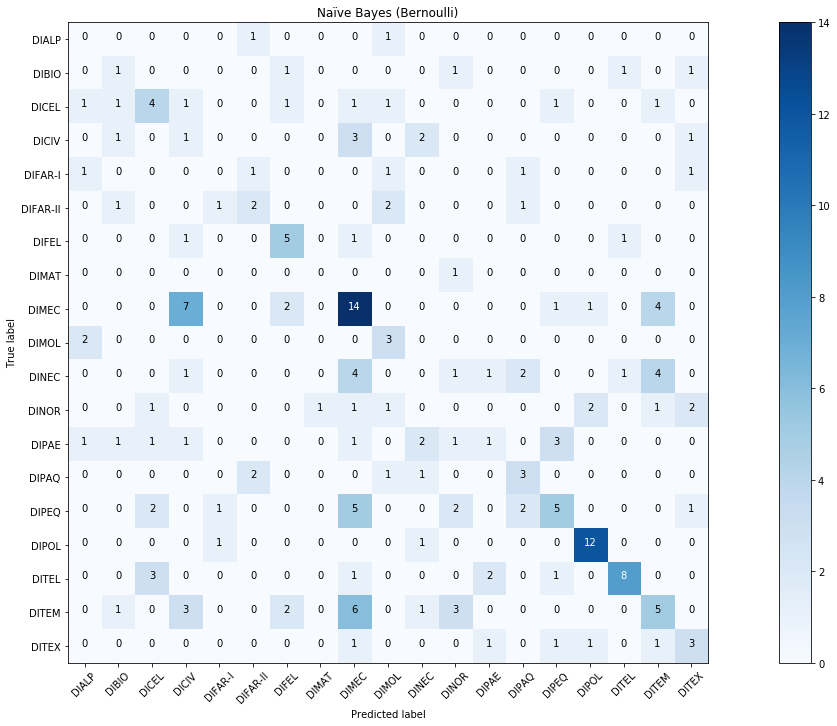

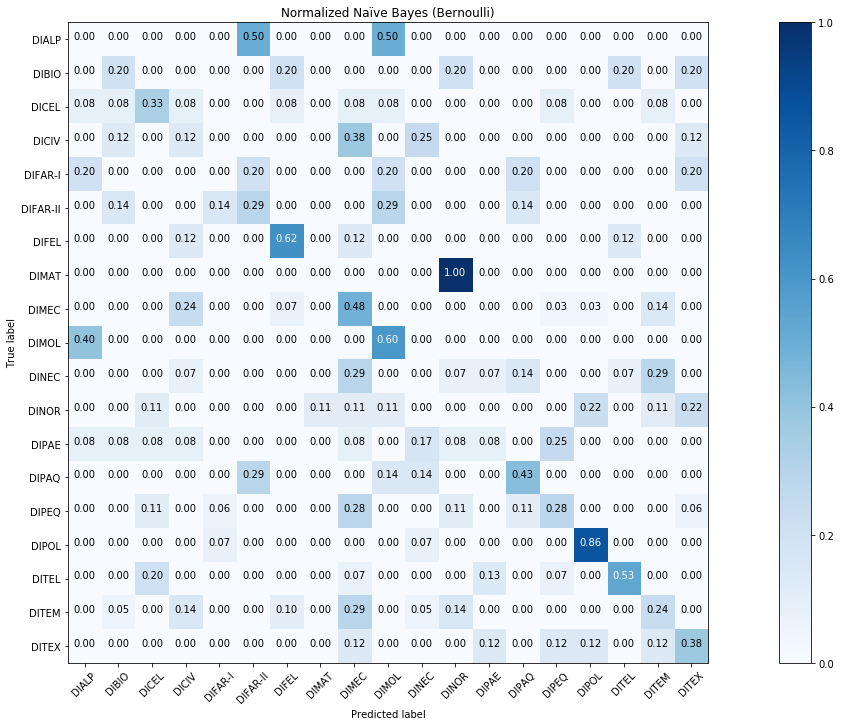

In [48]:
# Naïve Bayes - Bernoulli
import itertools
from sklearn.naive_bayes import BernoulliNB
cmap=plt.get_cmap('Blues')
np.set_printoptions(formatter={'float': '{: 0.3f}'.format}, precision=2)


# Train & Predict
algorithm_name = 'Naïve Bayes (Bernoulli)'
classifier = BernoulliNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print('Mean Accuracy: ', acc)

# F1_score
f1score = f1_score(y_test, y_pred, average=None, labels=np.arange(len(l_enc.classes_)))
print('F1 score: ', list(zip(l_enc.classes_, f1score)))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20, 10))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(algorithm_name)
plt.colorbar()
tick_marks = np.arange(len(list(l_enc.classes_)))
plt.xticks(tick_marks, list(l_enc.classes_), rotation=45)
plt.yticks(tick_marks, list(l_enc.classes_))
# fmt = '.2f' if normalize else 'd'
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Normalized Confusion Matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(20, 10))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Normalized ' + algorithm_name)
plt.colorbar()
tick_marks = np.arange(len(list(l_enc.classes_)))
plt.xticks(tick_marks, list(l_enc.classes_), rotation=45)
plt.yticks(tick_marks, list(l_enc.classes_))
# fmt = '.2f' if normalize else 'd'
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Mean Accuracy:  0.205
F1 score:  [('DIALP', 0.0), ('DIBIO', 0.0), ('DICEL', 0.14814814814814814), ('DICIV', 0.07692307692307691), ('DIFAR-I', 0.16666666666666666), ('DIFAR-II', 0.22222222222222224), ('DIFEL', 0.0), ('DIMAT', 0.0), ('DIMEC', 0.28070175438596495), ('DIMOL', 0.5), ('DINEC', 0.07142857142857142), ('DINOR', 0.08695652173913043), ('DIPAE', 0.2105263157894737), ('DIPAQ', 0.16666666666666666), ('DIPEQ', 0.11428571428571428), ('DIPOL', 0.3846153846153846), ('DITEL', 0.4666666666666667), ('DITEM', 0.2222222222222222), ('DITEX', 0.3076923076923077)]


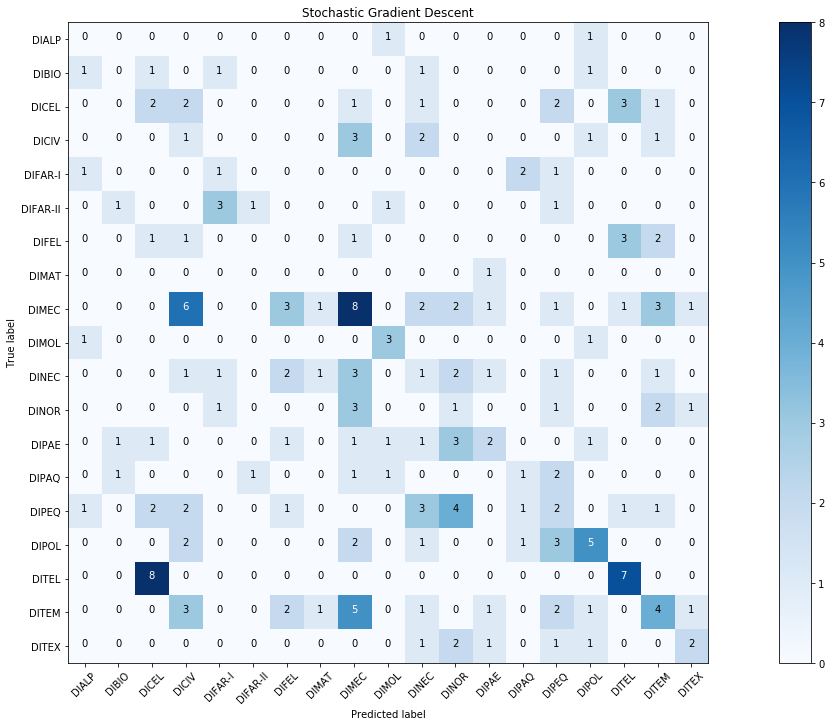

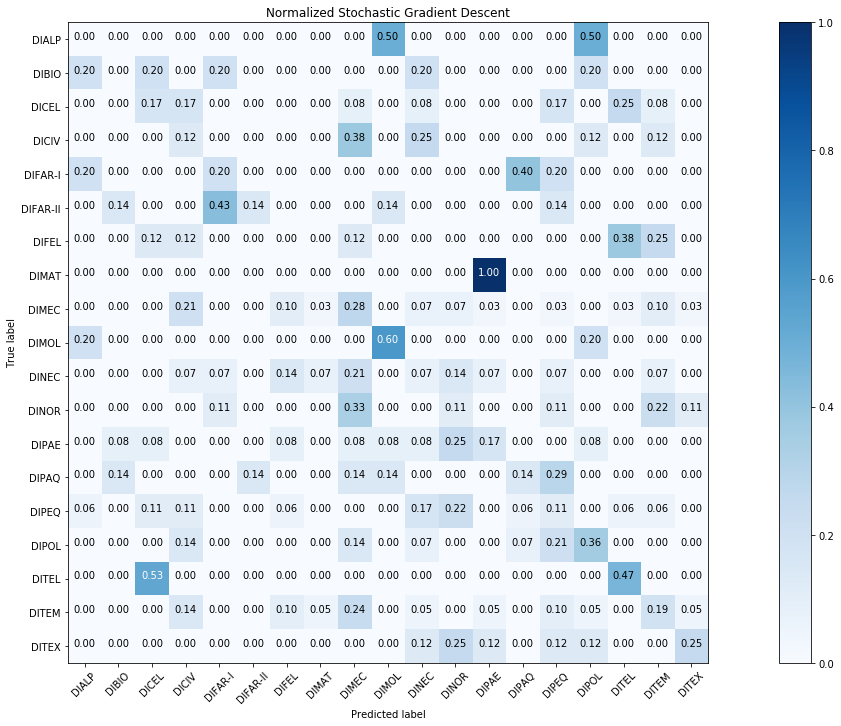

In [49]:
# Decision Tree
import itertools
from sklearn import tree
cmap=plt.get_cmap('Blues')
np.set_printoptions(formatter={'float': '{: 0.3f}'.format}, precision=2)


# Train & Predict
algorithm_name = 'Stochastic Gradient Descent'
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print('Mean Accuracy: ', acc)

# F1_score
f1score = f1_score(y_test, y_pred, average=None, labels=np.arange(len(l_enc.classes_)))
print('F1 score: ', list(zip(l_enc.classes_, f1score)))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20, 10))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(algorithm_name)
plt.colorbar()
tick_marks = np.arange(len(list(l_enc.classes_)))
plt.xticks(tick_marks, list(l_enc.classes_), rotation=45)
plt.yticks(tick_marks, list(l_enc.classes_))
# fmt = '.2f' if normalize else 'd'
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Normalized Confusion Matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(20, 10))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Normalized ' + algorithm_name)
plt.colorbar()
tick_marks = np.arange(len(list(l_enc.classes_)))
plt.xticks(tick_marks, list(l_enc.classes_), rotation=45)
plt.yticks(tick_marks, list(l_enc.classes_))
# fmt = '.2f' if normalize else 'd'
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Mean Accuracy:  0.25
F1 score:  [('DIALP', 0.21052631578947367), ('DIBIO', 0.0), ('DICEL', 0.16), ('DICIV', 0.16216216216216217), ('DIFAR-I', 0.0), ('DIFAR-II', 0.14285714285714285), ('DIFEL', 0.42857142857142855), ('DIMAT', 0.0), ('DIMEC', 0.37837837837837834), ('DIMOL', 0.3636363636363636), ('DINEC', 0.08695652173913043), ('DINOR', 0.13333333333333333), ('DIPAE', 0.13333333333333333), ('DIPAQ', 0.0), ('DIPEQ', 0.08), ('DIPOL', 0.4615384615384615), ('DITEL', 0.6), ('DITEM', 0.07142857142857142), ('DITEX', 0.375)]


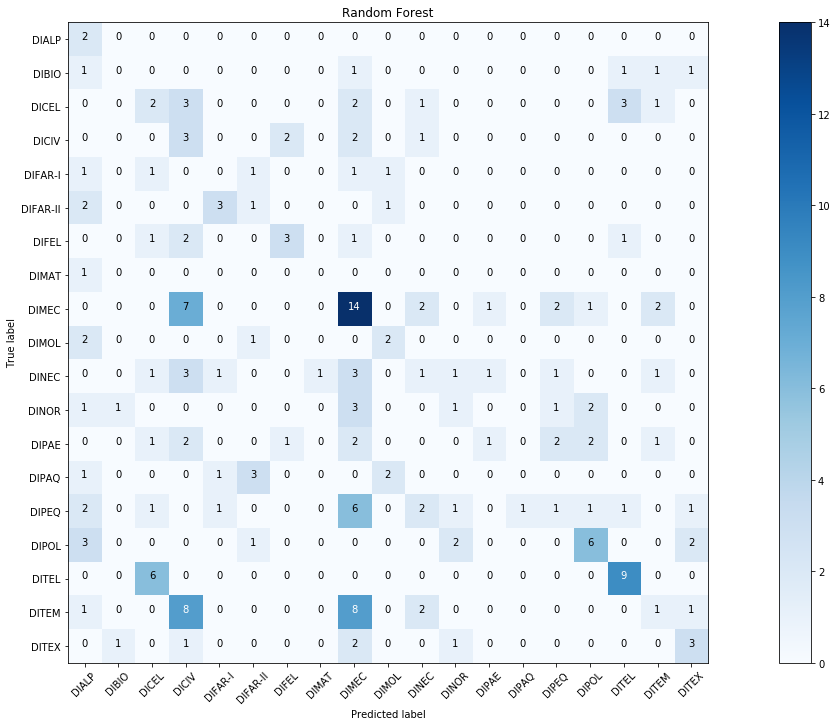

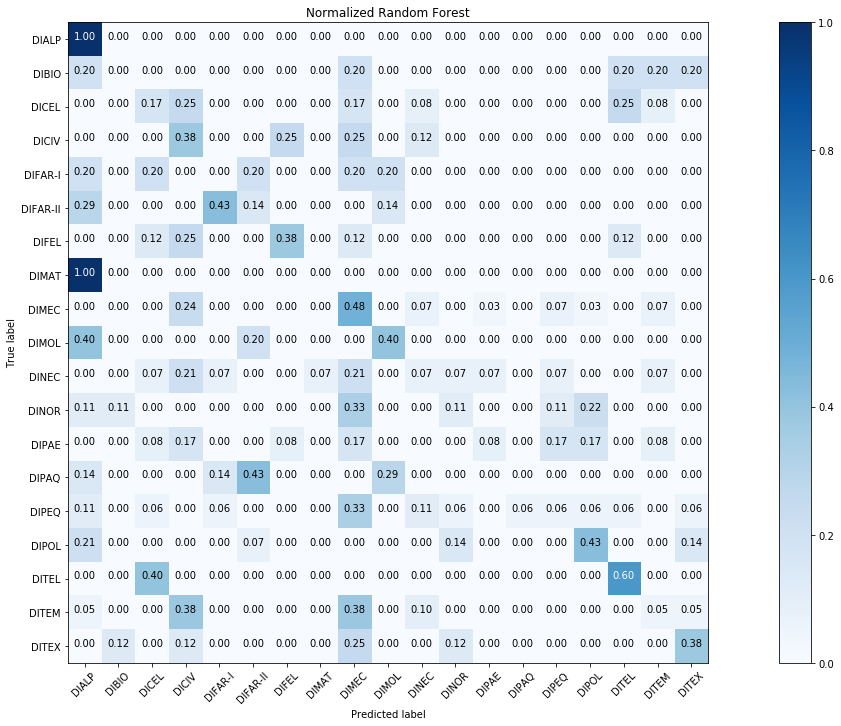

In [50]:
# Random Forest
import itertools
from sklearn.ensemble import RandomForestClassifier
cmap=plt.get_cmap('Blues')
np.set_printoptions(formatter={'float': '{: 0.3f}'.format}, precision=2)


# Train & Predict
algorithm_name = 'Random Forest'
classifier = RandomForestClassifier(max_depth=None, min_samples_split=2, random_state=197)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print('Mean Accuracy: ', acc)

# F1_score
f1score = f1_score(y_test, y_pred, average=None, labels=np.arange(len(l_enc.classes_)))
print('F1 score: ', list(zip(l_enc.classes_, f1score)))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20, 10))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(algorithm_name)
plt.colorbar()
tick_marks = np.arange(len(list(l_enc.classes_)))
plt.xticks(tick_marks, list(l_enc.classes_), rotation=45)
plt.yticks(tick_marks, list(l_enc.classes_))
# fmt = '.2f' if normalize else 'd'
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Normalized Confusion Matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(20, 10))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Normalized ' + algorithm_name)
plt.colorbar()
tick_marks = np.arange(len(list(l_enc.classes_)))
plt.xticks(tick_marks, list(l_enc.classes_), rotation=45)
plt.yticks(tick_marks, list(l_enc.classes_))
# fmt = '.2f' if normalize else 'd'
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Mean Accuracy:  0.315
F1 score:  [('DIALP', 0.0), ('DIBIO', 0.14285714285714285), ('DICEL', 0.1), ('DICIV', 0.1081081081081081), ('DIFAR-I', 0.0), ('DIFAR-II', 0.4615384615384615), ('DIFEL', 0.4210526315789474), ('DIMAT', 0.0), ('DIMEC', 0.4489795918367347), ('DIMOL', 0.25), ('DINEC', 0.27272727272727276), ('DINOR', 0.125), ('DIPAE', 0.15384615384615385), ('DIPAQ', 0.4), ('DIPEQ', 0.09999999999999999), ('DIPOL', 0.588235294117647), ('DITEL', 0.611111111111111), ('DITEM', 0.2941176470588235), ('DITEX', 0.25)]


/opt/ar-application_router/.venv/lib64/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


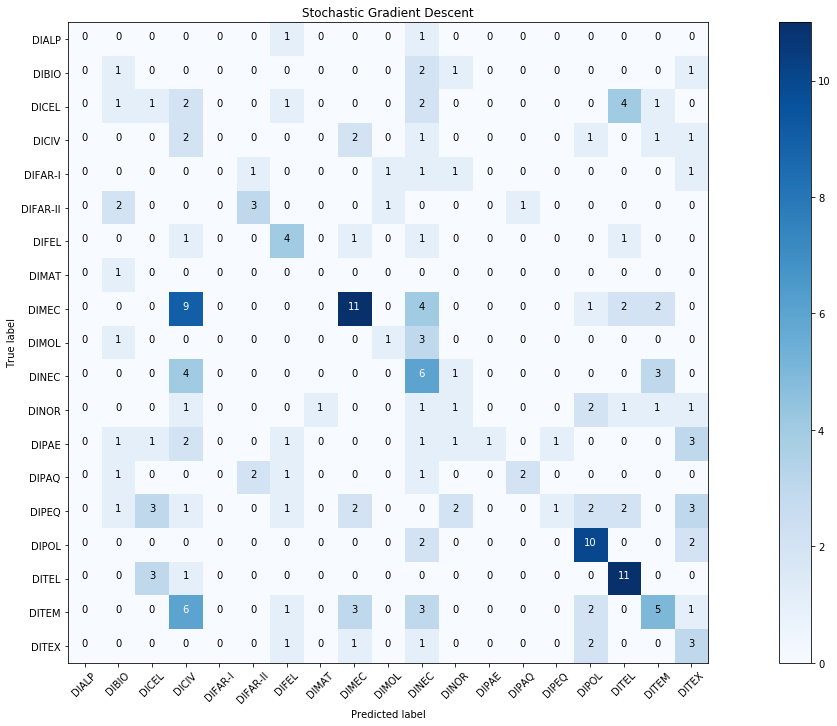

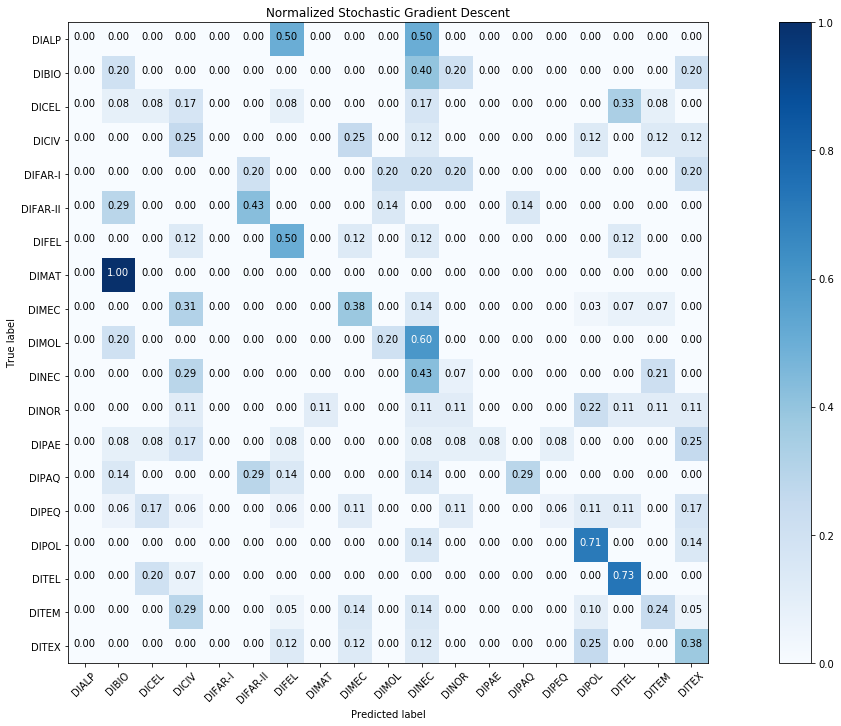

In [51]:
# SGD - Stochastic Gradient Descent
import itertools
from sklearn.linear_model import SGDClassifier
cmap=plt.get_cmap('Blues')
np.set_printoptions(formatter={'float': '{: 0.3f}'.format}, precision=2)


# Train & Predict
algorithm_name = 'Stochastic Gradient Descent'
classifier = SGDClassifier(loss="hinge", penalty="l2", max_iter=5000, tol=1e-5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print('Mean Accuracy: ', acc)

# F1_score
f1score = f1_score(y_test, y_pred, average=None, labels=np.arange(len(l_enc.classes_)))
print('F1 score: ', list(zip(l_enc.classes_, f1score)))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20, 10))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(algorithm_name)
plt.colorbar()
tick_marks = np.arange(len(list(l_enc.classes_)))
plt.xticks(tick_marks, list(l_enc.classes_), rotation=45)
plt.yticks(tick_marks, list(l_enc.classes_))
# fmt = '.2f' if normalize else 'd'
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Normalized Confusion Matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(20, 10))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Normalized ' + algorithm_name)
plt.colorbar()
tick_marks = np.arange(len(list(l_enc.classes_)))
plt.xticks(tick_marks, list(l_enc.classes_), rotation=45)
plt.yticks(tick_marks, list(l_enc.classes_))
# fmt = '.2f' if normalize else 'd'
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Mean Accuracy:  0.37
F1 score:  [('DIALP', 0.0), ('DIBIO', 0.25), ('DICEL', 0.16), ('DICIV', 0.0), ('DIFAR-I', 0.3636363636363636), ('DIFAR-II', 0.5), ('DIFEL', 0.5714285714285714), ('DIMAT', 0.0), ('DIMEC', 0.507936507936508), ('DIMOL', 0.4000000000000001), ('DINEC', 0.25), ('DINOR', 0.17391304347826086), ('DIPAE', 0.26666666666666666), ('DIPAQ', 0.22222222222222224), ('DIPEQ', 0.29411764705882354), ('DIPOL', 0.5833333333333334), ('DITEL', 0.6875), ('DITEM', 0.3225806451612903), ('DITEX', 0.4)]


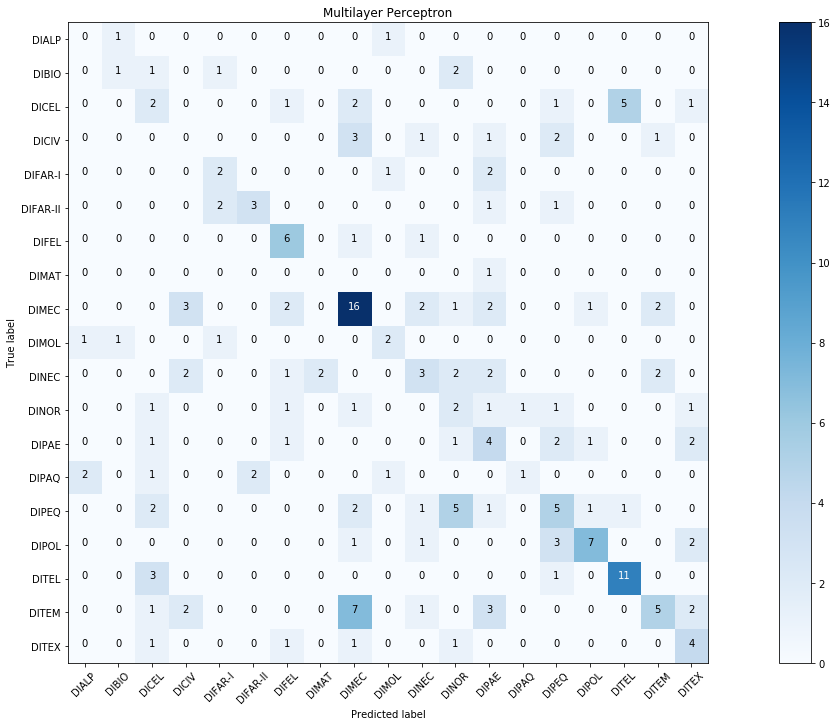

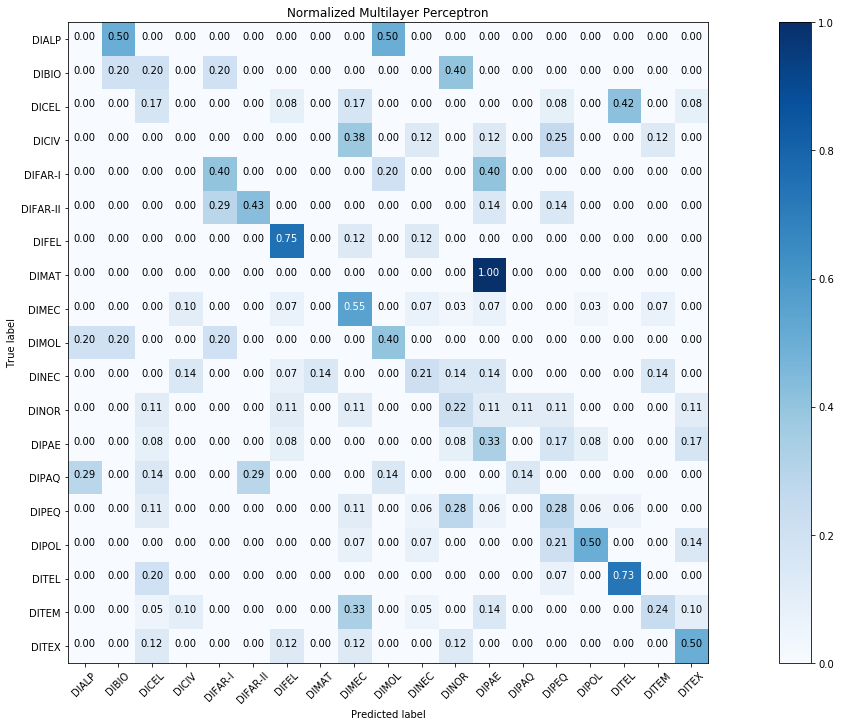

In [52]:
# Multi-layer Perceptron
import itertools
from sklearn.neural_network import MLPClassifier
cmap=plt.get_cmap('Blues')
np.set_printoptions(formatter={'float': '{: 0.3f}'.format}, precision=2)


# Train & Predict
algorithm_name = 'Multilayer Perceptron'
classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(100, 50), random_state=326)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print('Mean Accuracy: ', acc)

# F1_score
f1score = f1_score(y_test, y_pred, average=None, labels=np.arange(len(l_enc.classes_)))
print('F1 score: ', list(zip(l_enc.classes_, f1score)))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20, 10))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(algorithm_name)
plt.colorbar()
tick_marks = np.arange(len(list(l_enc.classes_)))
plt.xticks(tick_marks, list(l_enc.classes_), rotation=45)
plt.yticks(tick_marks, list(l_enc.classes_))
# fmt = '.2f' if normalize else 'd'
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Normalized Confusion Matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(20, 10))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Normalized ' + algorithm_name)
plt.colorbar()
tick_marks = np.arange(len(list(l_enc.classes_)))
plt.xticks(tick_marks, list(l_enc.classes_), rotation=45)
plt.yticks(tick_marks, list(l_enc.classes_))
# fmt = '.2f' if normalize else 'd'
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Mean Accuracy:  0.38
F1 score:  [('DIALP', 0.25), ('DIBIO', 0.0), ('DICEL', 0.2), ('DICIV', 0.0), ('DIFAR-I', 0.0), ('DIFAR-II', 0.4615384615384615), ('DIFEL', 0.47058823529411764), ('DIMAT', 0.0), ('DIMEC', 0.5128205128205129), ('DIMOL', 0.5), ('DINEC', 0.30769230769230765), ('DINOR', 0.19999999999999998), ('DIPAE', 0.26666666666666666), ('DIPAQ', 0.25), ('DIPEQ', 0.2777777777777778), ('DIPOL', 0.6000000000000001), ('DITEL', 0.6666666666666666), ('DITEM', 0.37499999999999994), ('DITEX', 0.26666666666666666)]


/opt/ar-application_router/.venv/lib64/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


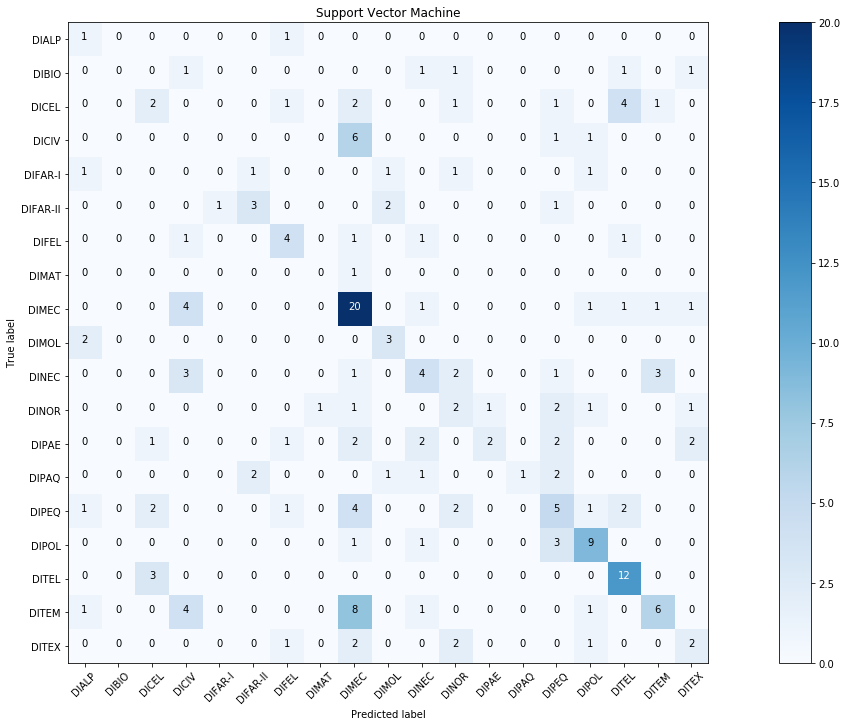

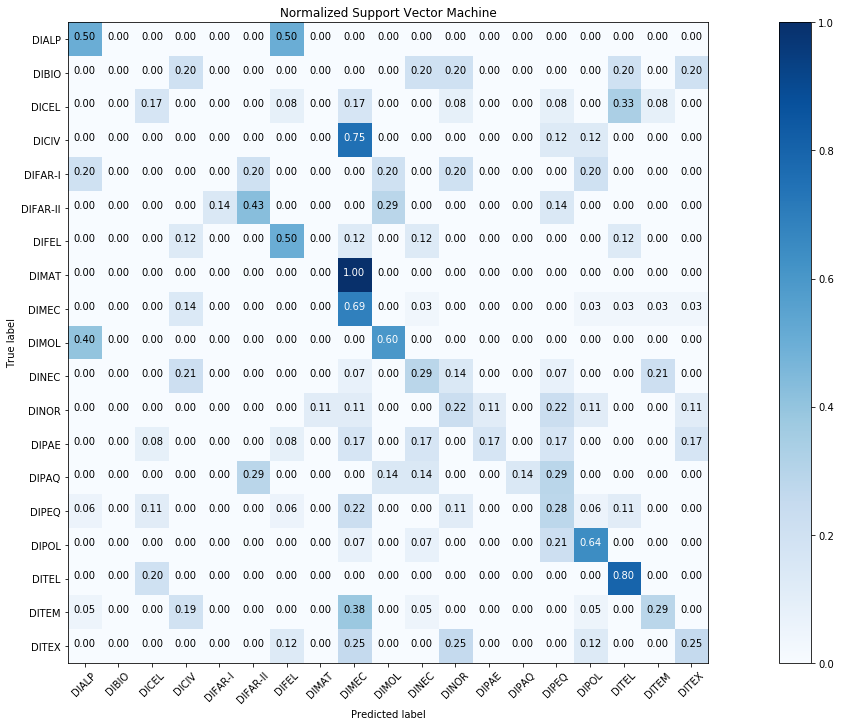

In [53]:
# SVM - Support Vector Machine
import itertools
from sklearn import svm
cmap=plt.get_cmap('Blues')
np.set_printoptions(formatter={'float': '{: 0.3f}'.format}, precision=2)


# Train & Predict
algorithm_name = 'Support Vector Machine'
classifier = svm.LinearSVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print('Mean Accuracy: ', acc)

# F1_score
f1score = f1_score(y_test, y_pred, average=None, labels=np.arange(len(l_enc.classes_)))
print('F1 score: ', list(zip(l_enc.classes_, f1score)))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20, 10))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(algorithm_name)
plt.colorbar()
tick_marks = np.arange(len(list(l_enc.classes_)))
plt.xticks(tick_marks, list(l_enc.classes_), rotation=45)
plt.yticks(tick_marks, list(l_enc.classes_))
# fmt = '.2f' if normalize else 'd'
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Normalized Confusion Matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(20, 10))
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Normalized ' + algorithm_name)
plt.colorbar()
tick_marks = np.arange(len(list(l_enc.classes_)))
plt.xticks(tick_marks, list(l_enc.classes_), rotation=45)
plt.yticks(tick_marks, list(l_enc.classes_))
# fmt = '.2f' if normalize else 'd'
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()